In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Check for duplicates
print(len(np.unique(train['ID'])) == len(train))
len(np.unique(test['ID'])) == len(test)

# Check the length of the training set for reference
len(train)

True


76020

In [3]:
# remove ID in different datasets
train_id = train['ID']
train = train.drop(['ID'], axis = 1)

test_id = test['ID']
test = test.drop(['ID'], axis = 1)

In [4]:
train.head()

var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0     2     23                 0.0                      0.0   
1     2     34                 0.0                      0.0   
2     2     23                 0.0                      0.0   
3     2     37                 0.0                    195.0   
4     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  imp_op_var40_ult1  \
0                      0.0                      0.0                0.0   
1                      0.0                      0.0                0.0   
2                      0.0                      0.0                0.0   
3                      0.0                      0.0                0.0   
4                      0.0                      0.0                0.0   

    ...    saldo_medio_var33_hace2  saldo_medio_var33_hace3  \
0   ...                        0.0                      0.0   
1   ...                        0.0                      0.0   
2   ...                        0.0                      0.0   
3   ...                        0.0                      0.0   
4   ...                        0.0                      0.0   

   saldo_medio_var33_ult1  saldo_medio_var33_ult3  saldo_medio_var44_hace2  \
0                     0.0                     0.0                      0.0   
1                     0.0                     0.0                      0.0   
2                     0.0                     0.0                      0.0   
3                     0.0                     0.0                      0.0   
4                     0.0                     0.0                      0.0   

   saldo_medio_var44_hace3  saldo_medio_var44_ult1  saldo_medio_var44_ult3  \
0                      0.0                     0.0                     0.0   
1                      0.0                     0.0                     0.0   
2                      0.0                     0.0                     0.0   
3                      0.0                     0.0                     0.0   
4                      0.0                     0.0                     0.0   

           var38  TARGET  
0   39205.170000       0  
1   49278.030000       0  
2   67333.770000       0  
3   64007.970000       0  
4  117310.979016       0  

[5 rows x 370 columns]

In [5]:
# happy customers have TARGET == 0, unhappy custormers have TARGET==1
# A little less then 4% are happy => unbalanced dataset
df = pd.DataFrame(train.TARGET.value_counts())
df['Percentage'] = 100 * df['TARGET'] / train.shape[0]
df

TARGET  Percentage
0   73012   96.043147
1    3008    3.956853

In [6]:
# we will merge both datasets and separate target
target = pd.DataFrame(train['TARGET'])
train = train.drop(['TARGET'], axis = 1)
full = pd.concat([train, test]).reset_index(drop=True)

# insert target again on train to keep the analysis with happy and unhappy
train['TARGET'] = target

In [7]:
len(full) # just to check the length is 76 020(train) + 75 818 (test)

151838

In [8]:
# create a function to check nulls
def check_nulls(df):
    nulls = np.sum(df.isnull())
    nullcols = nulls.loc[(nulls != 0)]
    dtypes = df.dtypes
    dtypes2 = dtypes.loc[(nulls != 0)]
    info = pd.concat([nullcols, dtypes2], axis=1).sort_values(by=0, ascending=False)
    print(info)
    print("There are", len(nullcols), "columns with missing values")
    
# use the function    
check_nulls(full)  

Empty DataFrame
Columns: [0, 1]
Index: []
There are 0 columns with missing values


## Let's start by analyzing each column

In [9]:
# var3 looks like nationality
full.var3.value_counts()[:10]
# We can see that 2 is the most common value

 2         148127
 8            254
-999999       236
 9            218
 3            215
 13           205
 1            204
 7            170
 12           168
 10           157
Name: var3, dtype: int64

In [10]:
full.var3 = full.var3.replace(-999999, 2) # replaced by most common value

In [11]:
# Looks like the age for var15
full.var15.value_counts()[:10]

23    40524
24    12419
25     8482
26     6697
27     5649
28     4352
31     3531
29     3450
30     3242
35     3107
Name: var15, dtype: int64

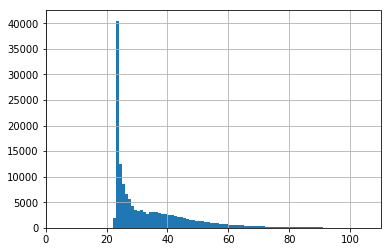

In [12]:
full.var15.hist(bins = 100)
plt.show() # most values in the 20-28 zone

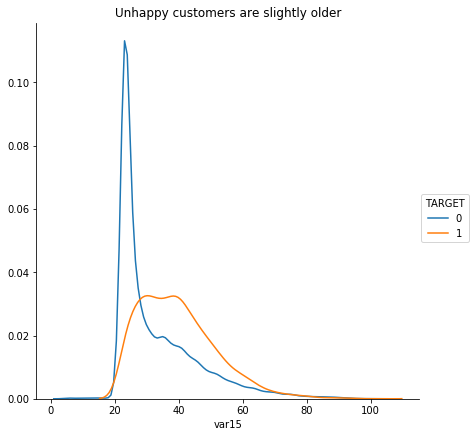

In [13]:
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "var15") \
   .add_legend()
plt.title('Unhappy customers are slightly older')
plt.show() # unhappy customers are older

In [14]:
# Var38 is supposed to be the mortgage value according to some kernels on kaggle
# it is somehow the value fo the customer
full.var38.describe()

count    1.518380e+05
mean     1.173110e+05
std      2.177175e+05
min      1.202730e+03
25%      6.770562e+04
50%      1.061020e+05
75%      1.185435e+05
max      2.889440e+07
Name: var38, dtype: float64

In [15]:
train.loc[train['TARGET'] == 1, 'var38'].describe()# mortgage is way higher when customer is unhappy

count    3.008000e+03
mean     9.967828e+04
std      1.063098e+05
min      1.113663e+04
25%      5.716094e+04
50%      8.621997e+04
75%      1.173110e+05
max      3.988595e+06
Name: var38, dtype: float64

In [16]:
train.var38.describe()

count    7.602000e+04
mean     1.172358e+05
std      1.826646e+05
min      5.163750e+03
25%      6.787061e+04
50%      1.064092e+05
75%      1.187563e+05
max      2.203474e+07
Name: var38, dtype: float64

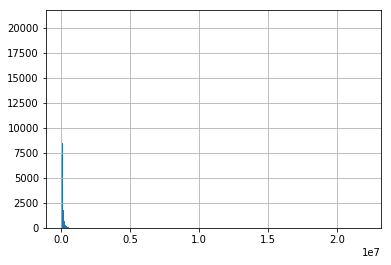

In [17]:
train.var38.hist(bins = 1000)
plt.show() # not a normal distribution
# we will apply log to it

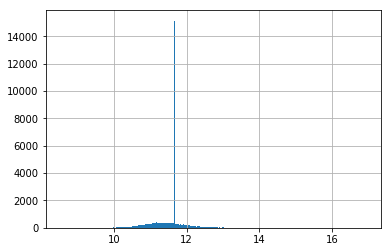

In [18]:
train.var38.map(np.log).hist(bins=1000)
plt.show() # weird spike just in the middle WTF, let's see the value

In [19]:
train.var38.map(np.log).mode()

0    11.672584
dtype: float64

In [20]:
# Most common values for var38
train.var38.value_counts() # its 117 310, which is quite similar to the mean obtained before
full.var38.value_counts()

117310.979016    29673
451931.220000       32
288997.440000       21
128318.520000       19
463625.160000       17
104563.800000       17
97639.560000        14
168733.620000       13
104644.410000       13
329603.970000       13
100466.730000       12
236690.340000       12
227397.720000       11
125722.440000       10
135522.150000       10
67088.310000        10
83174.280000        10
152784.210000        9
163432.470000        9
105260.880000        9
107266.650000        9
70813.800000         9
167709.720000        9
56021.610000         9
148736.190000        9
110227.950000        8
42932.610000         8
63203.340000         8
148781.160000        8
108644.820000        8
                 ...  
53711.670000         1
125710.920000        1
61258.530000         1
64729.200000         1
64805.550000         1
62110.770000         1
82817.100000         1
167615.010000        1
75589.680000         1
102198.540000        1
89754.060000         1
92926.830000         1
193402.0500

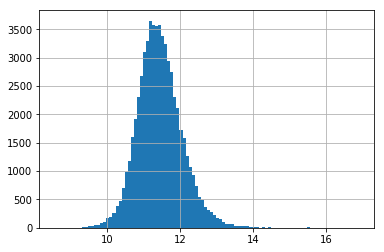

In [21]:
# Maybe by excluding this value we can normalize var38
train.loc[~np.isclose(train.var38, 117310.979016), 'var38'].map(np.log).hist(bins=100)
plt.show() # boom!

In [22]:
len(full) # checkpoint

151838

In [23]:
# var38mc == 1 when var38 has the most common value and 0 otherwise
# logvar38 is log transformed feature when var38mc is 0, zero otherwise

full['var38mc'] = np.isclose(full.var38, 117310.979016)
full['logvar38'] = full.loc[~full['var38mc'], 'var38'].map(np.log)
full.loc[full['var38mc'], 'logvar38'] = 0

In [24]:
import re # in order to know the variables that starts with 'var'

var_cols = [col for col in full.columns if 'var' in col]
r = re.compile("^var")
newlist = filter(r.match, var_cols)
print([i for i in newlist])


['var3', 'var15', 'var36', 'var21', 'var38', 'var38mc']


In [25]:
# Var36

full.var36.value_counts() # 99 looks like NA value and its the most common one can be replaced by 3
# too many to be an NA but still weird

99    60159
3     44393
1     29032
2     17472
0       782
Name: var36, dtype: int64

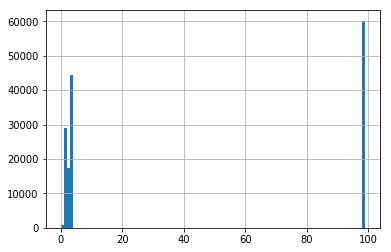

In [26]:
full.var36.hist(bins = 100)
plt.show()

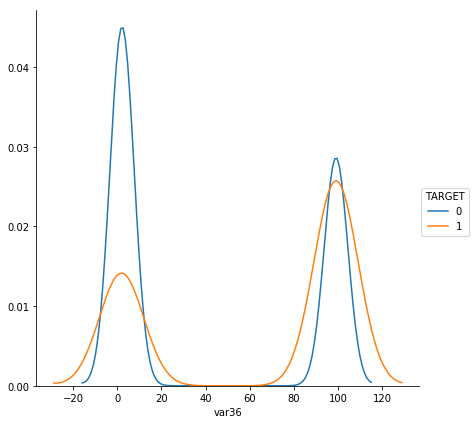

In [27]:
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "var36") \
   .add_legend()
plt.show()
# less unhappy customer with var36 == [0,1,2,3]

In [28]:
#var21
full.var21.value_counts() # nearly everything is 0 we can delete this column

full = full.drop(['var21'], axis = 1)

## Keep cleaning

#### Low variance columns will be removed

In [29]:
non_dis = []
for clmn in full.columns:
    try: # Variance of each column
        tmp = full.loc[:,clmn].var()
        if tmp == 0:
            non_dis.append(clmn) # Store names of columns with no variance for removing them
    except:
        continue

print(len(non_dis), 'of these columns provide no value, so we can get rid of these.')

34 of these columns provide no value, so we can get rid of these.


#### Repeated columns will be removed

In [30]:
full = full.drop(non_dis, axis=1)

In [31]:
len(full) #checkpoint

151838

In [32]:
dupl = [] # List of duplicated columns
allCols = full.columns.tolist() # Store the names of all the columns
for clmn in full.columns:
    tmp = full.loc[:,clmn].values # Store the values of the column we will compare
    if clmn in allCols: # Remove the column from our list of column names so we are not comparing it to itself
        allCols.remove(clmn)
    for col in allCols: # Loop through the remaining cols
        if col not in dupl: # If the column is not present in our duplicated list, compare it to the others
            if np.array_equal(tmp, full.loc[:,col].values): # If a duplicated is found, add it to the dup. list
                dupl.append(col)
                allCols.remove(col)
print('There are',len(dupl),'duplicated columns.')

There are 27 duplicated columns.


In [33]:
full = full.drop(dupl, axis=1)

### Check for booleans

In [34]:
bool_cols = []
for col in full.columns:
    un_vals = len(full.loc[:,col].unique())
    if un_vals == 2:
        if 0 in full.loc[:,col].unique() and 1 in full.loc[:,col].unique():
            bool_cols.append(col)
            
print('There are', len(bool_cols), 'Boolean (1/0) variables in the dataset')

There are 57 Boolean (1/0) variables in the dataset


In [35]:
clmns = list(full.columns.values)
#clmns.remove('ID')
#clmns.remove('TARGET')
for col in clmns:
    un_vals = len(full.loc[:,col].unique())
    if (col not in bool_cols) and (un_vals <= 2):
        full.loc[full.loc[:,col] != 0, col] = 1
        full.loc[:,col] = full.loc[:,col].astype(int)
        bool_cols.append(col)

print('Now, there are', len(bool_cols), 'Boolean (1/0) variables in the dataset')

Now, there are 82 Boolean (1/0) variables in the dataset


### Remove duplicates again

In [36]:
dupl = [] # List of duplicated columns
allCols = full.columns.tolist() # Store the names of all the columns
for clmn in full.columns:
    tmp = full.loc[:,clmn].values # Store the values of the column we will compare
    if clmn in allCols: # Remove the column from our list of column names so we are not comparing it to itself
        allCols.remove(clmn)
    for col in allCols: # Loop through the remaining cols
        if col not in dupl: # If the column is not present in our duplicated list, compare it to the others
            if np.array_equal(tmp, full.loc[:,col].values): # If a duplicated is found, add it to the dup. list
                dupl.append(col)
                allCols.remove(col)
#                 print(clmn,col)
print('There are',len(dupl),'duplicated columns.')

full = full.drop(dupl, axis = 1)

There are 18 duplicated columns.


## MODEL

In [37]:
# Split data again
train_2 = full.iloc[:76020, :] 
test_2 = full.iloc[76020:, :]

/home/diego/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


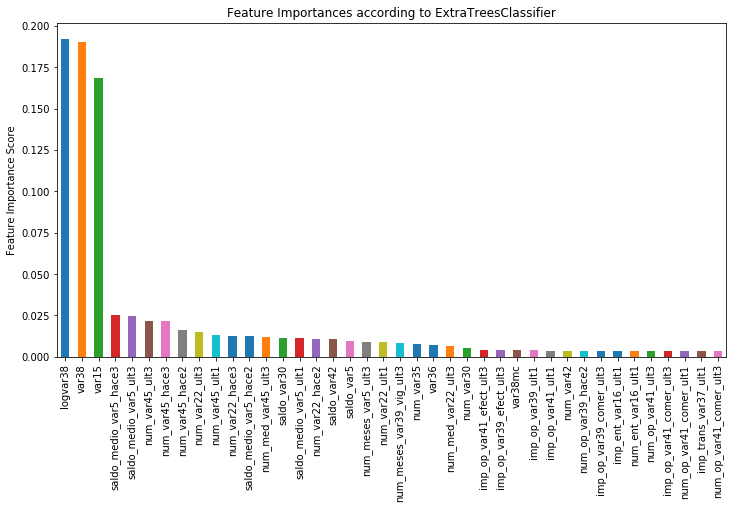

In [38]:
from sklearn.ensemble import ExtraTreesClassifier

## # Feature selection
clf = ExtraTreesClassifier(random_state = 69)
selector = clf.fit(train_2, target)

# plot most important features
feat_imp = pd.Series(clf.feature_importances_, index = train_2.columns.values).sort_values(ascending = False)
feat_imp[:40].plot(kind = 'bar', title = 'Feature Importances according to ExtraTreesClassifier', 
                   figsize = (12, 8))

plt.ylabel('Feature Importance Score')
plt.subplots_adjust(bottom = 0.3)
plt.savefig('1.png')
plt.show()


In [39]:
from sklearn.feature_selection import SelectFromModel

# clf.feature_importances_ 
fs = SelectFromModel(selector, prefit=True)

train_fs = fs.transform(train_2)
test_fs = fs.transform(test_2)

print(train_fs.shape, test_fs.shape)

(76020, 34) (75818, 34)


In [41]:
# RANDOM SEARCH
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 6, 8, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8, 10, 12, 14]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


{'bootstrap': [True, False],
 'max_depth': [30, 40, 50, 60, 70, 80, 90, 100, 200, 250, 300, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 6, 8, 10],
 'min_samples_split': [2, 5, 6, 8, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}

{'bootstrap': [True, False],
 'max_depth': [30, 40, 50, 60, 70, 80, 90, 100, 200, 250, 300, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 6, 8, 10],
 'min_samples_split': [2, 5, 6, 8, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}

In [42]:
# MODEL
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 5, verbose=2, random_state=69, n_jobs = -1)

# Fit the random search model
rf_random.fit(train_fs, target)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True 
[CV] n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True 
[CV] n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True 
[CV] n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionW

[CV]  n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True, total=  49.6s
[CV] n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True, total=  51.0s
[CV] n_estimators=911, min_samples_split=5, min_samples_leaf=8, max_features=auto, max_depth=10, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True, total=  51.9s
[CV] n_estimators=911, min_samples_split=5, min_samples_leaf=8, max_features=auto, max_depth=10, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True, total=  52.4s
[CV] n_estimators=911, min_samples_split=5, min_samples_leaf=8, max_features=auto, max_depth=10, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True, total=  52.0s
[CV] n_estimators=911, min_samples_split=5, min_samples_leaf=8, max_features=auto, max_depth=10, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=5, min_samples_leaf=8, max_features=auto, max_depth=10, bootstrap=False, total= 2.6min
[CV] n_estimators=911, min_samples_split=5, min_samples_leaf=8, max_features=auto, max_depth=10, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=5, min_samples_leaf=8, max_features=auto, max_depth=10, bootstrap=False, total= 2.6min
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=12, max_features=auto, max_depth=70, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=5, min_samples_leaf=8, max_features=auto, max_depth=10, bootstrap=False, total= 2.6min
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=12, max_features=auto, max_depth=70, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=12, max_features=auto, max_depth=70, bootstrap=False, total=  40.8s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=12, max_features=auto, max_depth=70, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=12, max_features=auto, max_depth=70, bootstrap=False, total=  44.9s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=12, max_features=auto, max_depth=70, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=5, min_samples_leaf=8, max_features=auto, max_depth=10, bootstrap=False, total= 2.6min
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=12, max_features=auto, max_depth=70, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=12, max_features=auto, max_depth=70, bootstrap=False, total=  39.3s
[CV] n_estimators=644, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=30, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=12, max_features=auto, max_depth=70, bootstrap=False, total=  38.4s
[CV] n_estimators=644, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=30, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=12, max_features=auto, max_depth=70, bootstrap=False, total=  38.9s
[CV] n_estimators=644, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=30, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=5, min_samples_leaf=8, max_features=auto, max_depth=10, bootstrap=False, total= 2.3min
[CV] n_estimators=644, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=30, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=30, bootstrap=False, total= 2.1min
[CV] n_estimators=644, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=30, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=30, bootstrap=False, total= 2.2min
[CV] n_estimators=555, min_samples_split=6, min_samples_leaf=14, max_features=auto, max_depth=60, bootstrap=True 
[CV]  n_estimators=644, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=30, bootstrap=False, total= 2.2min
[CV] n_estimators=555, min_samples_split=6, min_samples_leaf=14, max_features=auto, max_depth=60, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=30, bootstrap=False, total= 2.1min
[CV] n_estimators=555, min_samples_split=6, min_samples_leaf=14, max_features=auto, max_depth=60, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=6, min_samples_leaf=14, max_features=auto, max_depth=60, bootstrap=True, total= 1.2min
[CV] n_estimators=555, min_samples_split=6, min_samples_leaf=14, max_features=auto, max_depth=60, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=6, min_samples_leaf=14, max_features=auto, max_depth=60, bootstrap=True, total= 1.2min
[CV] n_estimators=555, min_samples_split=6, min_samples_leaf=14, max_features=auto, max_depth=60, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=6, min_samples_leaf=14, max_features=auto, max_depth=60, bootstrap=True, total= 1.2min
[CV] n_estimators=644, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=644, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=30, bootstrap=False, total= 2.2min
[CV] n_estimators=644, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=6, min_samples_leaf=14, max_features=auto, max_depth=60, bootstrap=True, total= 1.2min
[CV] n_estimators=644, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=6, min_samples_leaf=14, max_features=auto, max_depth=60, bootstrap=True, total= 1.2min
[CV] n_estimators=644, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total= 1.8min
[CV] n_estimators=644, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total= 1.8min
[CV] n_estimators=733, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=50, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total= 1.8min
[CV] n_estimators=733, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=50, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total= 1.8min
[CV] n_estimators=733, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=50, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total= 1.6min
[CV] n_estimators=733, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=50, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=733, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=50, bootstrap=False, total= 2.3min
[CV] n_estimators=733, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=50, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=733, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=50, bootstrap=False, total= 2.3min
[CV] n_estimators=644, min_samples_split=8, min_samples_leaf=14, max_features=auto, max_depth=80, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=733, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=50, bootstrap=False, total= 2.4min
[CV] n_estimators=644, min_samples_split=8, min_samples_leaf=14, max_features=auto, max_depth=80, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 14.5min


[CV]  n_estimators=733, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=50, bootstrap=False, total= 2.3min
[CV] n_estimators=644, min_samples_split=8, min_samples_leaf=14, max_features=auto, max_depth=80, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=8, min_samples_leaf=14, max_features=auto, max_depth=80, bootstrap=False, total= 2.1min
[CV] n_estimators=644, min_samples_split=8, min_samples_leaf=14, max_features=auto, max_depth=80, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=733, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=50, bootstrap=False, total= 2.5min
[CV] n_estimators=644, min_samples_split=8, min_samples_leaf=14, max_features=auto, max_depth=80, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=8, min_samples_leaf=14, max_features=auto, max_depth=80, bootstrap=False, total= 2.1min
[CV] n_estimators=555, min_samples_split=5, min_samples_leaf=8, max_features=sqrt, max_depth=110, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=8, min_samples_leaf=14, max_features=auto, max_depth=80, bootstrap=False, total= 2.3min
[CV] n_estimators=555, min_samples_split=5, min_samples_leaf=8, max_features=sqrt, max_depth=110, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=8, min_samples_leaf=14, max_features=auto, max_depth=80, bootstrap=False, total= 2.2min
[CV] n_estimators=555, min_samples_split=5, min_samples_leaf=8, max_features=sqrt, max_depth=110, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=5, min_samples_leaf=8, max_features=sqrt, max_depth=110, bootstrap=False, total= 2.0min
[CV] n_estimators=555, min_samples_split=5, min_samples_leaf=8, max_features=sqrt, max_depth=110, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=8, min_samples_leaf=14, max_features=auto, max_depth=80, bootstrap=False, total= 2.1min
[CV] n_estimators=555, min_samples_split=5, min_samples_leaf=8, max_features=sqrt, max_depth=110, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=5, min_samples_leaf=8, max_features=sqrt, max_depth=110, bootstrap=False, total= 1.8min
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=5, min_samples_leaf=8, max_features=sqrt, max_depth=110, bootstrap=False, total= 1.9min
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=5, min_samples_leaf=8, max_features=sqrt, max_depth=110, bootstrap=False, total= 1.8min
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False, total=  42.0s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=5, min_samples_leaf=8, max_features=sqrt, max_depth=110, bootstrap=False, total= 1.8min
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False, total=  45.8s
[CV] n_estimators=288, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False, total=  45.6s
[CV] n_estimators=288, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False, total=  47.3s
[CV] n_estimators=288, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False, total=  48.2s
[CV] n_estimators=288, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True, total=  40.7s
[CV] n_estimators=288, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True, total=  39.7s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=30, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True, total=  39.9s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=30, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True, total=  40.9s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=30, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True, total=  41.6s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=30, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=30, bootstrap=False, total= 3.2min
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=30, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=30, bootstrap=False, total= 3.2min
[CV] n_estimators=288, min_samples_split=8, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=30, bootstrap=False, total= 3.2min
[CV] n_estimators=288, min_samples_split=8, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=30, bootstrap=False, total= 3.1min
[CV] n_estimators=288, min_samples_split=8, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=8, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True, total=  35.6s
[CV] n_estimators=288, min_samples_split=8, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=8, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True, total=  38.2s
[CV] n_estimators=288, min_samples_split=8, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=8, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True, total=  38.0s
[CV] n_estimators=555, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=100, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=8, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True, total=  36.7s
[CV] n_estimators=555, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=100, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=8, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True, total=  37.1s
[CV] n_estimators=555, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=100, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=100, bootstrap=True, total= 1.3min
[CV] n_estimators=555, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=100, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=100, bootstrap=True, total= 1.3min
[CV] n_estimators=555, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=100, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=100, bootstrap=True, total= 1.4min
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=30, bootstrap=False, total= 3.4min
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=100, bootstrap=True, total= 1.2min
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=100, bootstrap=True, total= 1.3min
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, total= 1.6min
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, total= 1.6min
[CV] n_estimators=644, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=20, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, total= 1.7min
[CV] n_estimators=644, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=20, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, total= 1.7min
[CV] n_estimators=644, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=20, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, total= 1.7min
[CV] n_estimators=644, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=20, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=20, bootstrap=True, total= 1.5min
[CV] n_estimators=644, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=20, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=20, bootstrap=True, total= 1.6min
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=12, max_features=sqrt, max_depth=80, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=20, bootstrap=True, total= 1.5min
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=12, max_features=sqrt, max_depth=80, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=20, bootstrap=True, total= 1.4min
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=12, max_features=sqrt, max_depth=80, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=20, bootstrap=True, total= 1.4min
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=12, max_features=sqrt, max_depth=80, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=12, max_features=sqrt, max_depth=80, bootstrap=False, total=  54.9s
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=12, max_features=sqrt, max_depth=80, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=12, max_features=sqrt, max_depth=80, bootstrap=False, total=  53.3s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=12, max_features=sqrt, max_depth=80, bootstrap=False, total=  52.6s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=12, max_features=sqrt, max_depth=80, bootstrap=False, total=  53.4s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=12, max_features=sqrt, max_depth=80, bootstrap=False, total=  52.4s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total= 3.4min
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total= 3.5min
[CV] n_estimators=555, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total= 3.6min
[CV] n_estimators=555, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total= 3.6min
[CV] n_estimators=555, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total= 1.4min
[CV] n_estimators=555, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total= 1.4min
[CV] n_estimators=555, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total= 1.5min
[CV] n_estimators=644, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=50, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total= 1.4min
[CV] n_estimators=644, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=50, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total= 1.4min
[CV] n_estimators=644, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=50, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total= 3.9min
[CV] n_estimators=644, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=50, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=50, bootstrap=False, total= 2.4min
[CV] n_estimators=644, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=50, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=50, bootstrap=False, total= 2.3min
[CV] n_estimators=288, min_samples_split=8, min_samples_leaf=10, max_features=auto, max_depth=80, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=50, bootstrap=False, total= 2.4min
[CV] n_estimators=288, min_samples_split=8, min_samples_leaf=10, max_features=auto, max_depth=80, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=50, bootstrap=False, total= 2.4min
[CV] n_estimators=288, min_samples_split=8, min_samples_leaf=10, max_features=auto, max_depth=80, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=8, min_samples_leaf=10, max_features=auto, max_depth=80, bootstrap=False, total= 1.2min
[CV] n_estimators=288, min_samples_split=8, min_samples_leaf=10, max_features=auto, max_depth=80, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=50, bootstrap=False, total= 2.4min
[CV] n_estimators=288, min_samples_split=8, min_samples_leaf=10, max_features=auto, max_depth=80, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=8, min_samples_leaf=10, max_features=auto, max_depth=80, bootstrap=False, total= 1.2min
[CV] n_estimators=911, min_samples_split=10, min_samples_leaf=12, max_features=sqrt, max_depth=110, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=8, min_samples_leaf=10, max_features=auto, max_depth=80, bootstrap=False, total= 1.2min
[CV] n_estimators=911, min_samples_split=10, min_samples_leaf=12, max_features=sqrt, max_depth=110, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=8, min_samples_leaf=10, max_features=auto, max_depth=80, bootstrap=False, total= 1.2min
[CV] n_estimators=911, min_samples_split=10, min_samples_leaf=12, max_features=sqrt, max_depth=110, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=8, min_samples_leaf=10, max_features=auto, max_depth=80, bootstrap=False, total= 1.1min
[CV] n_estimators=911, min_samples_split=10, min_samples_leaf=12, max_features=sqrt, max_depth=110, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=10, min_samples_leaf=12, max_features=sqrt, max_depth=110, bootstrap=True, total= 2.2min
[CV] n_estimators=911, min_samples_split=10, min_samples_leaf=12, max_features=sqrt, max_depth=110, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=10, min_samples_leaf=12, max_features=sqrt, max_depth=110, bootstrap=True, total= 2.3min
[CV] n_estimators=822, min_samples_split=6, min_samples_leaf=12, max_features=sqrt, max_depth=70, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=10, min_samples_leaf=12, max_features=sqrt, max_depth=110, bootstrap=True, total= 2.3min
[CV] n_estimators=822, min_samples_split=6, min_samples_leaf=12, max_features=sqrt, max_depth=70, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=10, min_samples_leaf=12, max_features=sqrt, max_depth=110, bootstrap=True, total= 2.3min
[CV] n_estimators=822, min_samples_split=6, min_samples_leaf=12, max_features=sqrt, max_depth=70, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=10, min_samples_leaf=12, max_features=sqrt, max_depth=110, bootstrap=True, total= 2.2min
[CV] n_estimators=822, min_samples_split=6, min_samples_leaf=12, max_features=sqrt, max_depth=70, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=6, min_samples_leaf=12, max_features=sqrt, max_depth=70, bootstrap=True, total= 2.0min
[CV] n_estimators=822, min_samples_split=6, min_samples_leaf=12, max_features=sqrt, max_depth=70, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=6, min_samples_leaf=12, max_features=sqrt, max_depth=70, bootstrap=True, total= 2.0min
[CV] n_estimators=822, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=6, min_samples_leaf=12, max_features=sqrt, max_depth=70, bootstrap=True, total= 2.0min
[CV] n_estimators=822, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=6, min_samples_leaf=12, max_features=sqrt, max_depth=70, bootstrap=True, total= 2.0min
[CV] n_estimators=822, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=6, min_samples_leaf=12, max_features=sqrt, max_depth=70, bootstrap=True, total= 2.0min
[CV] n_estimators=822, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, total= 3.4min
[CV] n_estimators=822, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, total= 3.3min
[CV] n_estimators=822, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, total= 3.2min
[CV] n_estimators=822, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, total= 3.3min
[CV] n_estimators=822, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, total= 2.2min
[CV] n_estimators=822, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, total= 3.3min
[CV] n_estimators=822, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, total= 2.3min
[CV] n_estimators=377, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=70, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, total= 2.3min
[CV] n_estimators=377, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=70, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, total= 2.3min
[CV] n_estimators=377, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=70, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=377, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=70, bootstrap=False, total= 1.3min
[CV] n_estimators=377, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=70, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=377, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=70, bootstrap=False, total= 1.3min
[CV] n_estimators=377, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=70, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, total= 2.2min
[CV] n_estimators=200, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=377, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=70, bootstrap=False, total= 1.3min
[CV] n_estimators=200, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=  43.9s
[CV] n_estimators=200, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=377, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=70, bootstrap=False, total= 1.2min
[CV] n_estimators=200, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=377, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=70, bootstrap=False, total= 1.3min
[CV] n_estimators=200, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=  49.4s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=  43.5s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=  48.7s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=  46.4s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True, total=  32.0s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True, total=  30.4s
[CV] n_estimators=288, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True, total=  32.1s
[CV] n_estimators=288, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True, total=  30.7s
[CV] n_estimators=288, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True, total=  29.1s
[CV] n_estimators=288, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False, total= 1.1min
[CV] n_estimators=288, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False, total= 1.2min
[CV] n_estimators=822, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False, total= 1.1min
[CV] n_estimators=822, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False, total= 1.1min
[CV] n_estimators=822, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False, total= 1.1min
[CV] n_estimators=822, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True, total= 2.1min
[CV] n_estimators=822, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True, total= 2.2min
[CV] n_estimators=288, min_samples_split=2, min_samples_leaf=12, max_features=sqrt, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True, total= 2.1min
[CV] n_estimators=288, min_samples_split=2, min_samples_leaf=12, max_features=sqrt, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=2, min_samples_leaf=12, max_features=sqrt, max_depth=90, bootstrap=True, total=  36.6s
[CV] n_estimators=288, min_samples_split=2, min_samples_leaf=12, max_features=sqrt, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=2, min_samples_leaf=12, max_features=sqrt, max_depth=90, bootstrap=True, total=  38.0s
[CV] n_estimators=288, min_samples_split=2, min_samples_leaf=12, max_features=sqrt, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True, total= 2.2min
[CV] n_estimators=288, min_samples_split=2, min_samples_leaf=12, max_features=sqrt, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=2, min_samples_leaf=12, max_features=sqrt, max_depth=90, bootstrap=True, total=  39.8s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=10, max_features=auto, max_depth=80, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=2, min_samples_leaf=12, max_features=sqrt, max_depth=90, bootstrap=True, total=  35.5s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=10, max_features=auto, max_depth=80, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=2, min_samples_leaf=12, max_features=sqrt, max_depth=90, bootstrap=True, total=  35.3s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=10, max_features=auto, max_depth=80, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 68.2min


[CV]  n_estimators=822, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True, total= 2.2min
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=10, max_features=auto, max_depth=80, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=10, max_features=auto, max_depth=80, bootstrap=False, total= 3.3min
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=10, max_features=auto, max_depth=80, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=10, max_features=auto, max_depth=80, bootstrap=False, total= 3.5min
[CV] n_estimators=733, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=10, max_features=auto, max_depth=80, bootstrap=False, total= 3.4min
[CV] n_estimators=733, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=10, max_features=auto, max_depth=80, bootstrap=False, total= 3.2min
[CV] n_estimators=733, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=733, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, total= 1.9min
[CV] n_estimators=733, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=733, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, total= 2.0min
[CV] n_estimators=733, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=733, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, total= 1.9min
[CV] n_estimators=466, min_samples_split=8, min_samples_leaf=12, max_features=sqrt, max_depth=10, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=10, max_features=auto, max_depth=80, bootstrap=False, total= 3.5min
[CV] n_estimators=466, min_samples_split=8, min_samples_leaf=12, max_features=sqrt, max_depth=10, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=466, min_samples_split=8, min_samples_leaf=12, max_features=sqrt, max_depth=10, bootstrap=False, total= 1.2min
[CV] n_estimators=466, min_samples_split=8, min_samples_leaf=12, max_features=sqrt, max_depth=10, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=733, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, total= 1.9min
[CV] n_estimators=466, min_samples_split=8, min_samples_leaf=12, max_features=sqrt, max_depth=10, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=733, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, total= 1.9min
[CV] n_estimators=466, min_samples_split=8, min_samples_leaf=12, max_features=sqrt, max_depth=10, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=466, min_samples_split=8, min_samples_leaf=12, max_features=sqrt, max_depth=10, bootstrap=False, total= 1.2min
[CV] n_estimators=377, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=466, min_samples_split=8, min_samples_leaf=12, max_features=sqrt, max_depth=10, bootstrap=False, total= 1.1min
[CV] n_estimators=377, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=466, min_samples_split=8, min_samples_leaf=12, max_features=sqrt, max_depth=10, bootstrap=False, total= 1.1min
[CV] n_estimators=377, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=466, min_samples_split=8, min_samples_leaf=12, max_features=sqrt, max_depth=10, bootstrap=False, total= 1.2min
[CV] n_estimators=377, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=377, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=True, total=  58.3s
[CV] n_estimators=377, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=377, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=True, total=  58.8s
[CV] n_estimators=1000, min_samples_split=8, min_samples_leaf=12, max_features=auto, max_depth=50, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=377, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=True, total=  59.6s
[CV] n_estimators=1000, min_samples_split=8, min_samples_leaf=12, max_features=auto, max_depth=50, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=377, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=True, total=  57.9s
[CV] n_estimators=1000, min_samples_split=8, min_samples_leaf=12, max_features=auto, max_depth=50, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=377, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=True, total= 1.0min
[CV] n_estimators=1000, min_samples_split=8, min_samples_leaf=12, max_features=auto, max_depth=50, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=8, min_samples_leaf=12, max_features=auto, max_depth=50, bootstrap=True, total= 2.2min
[CV] n_estimators=1000, min_samples_split=8, min_samples_leaf=12, max_features=auto, max_depth=50, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=8, min_samples_leaf=12, max_features=auto, max_depth=50, bootstrap=True, total= 2.2min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=8, min_samples_leaf=12, max_features=auto, max_depth=50, bootstrap=True, total= 2.3min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=8, min_samples_leaf=12, max_features=auto, max_depth=50, bootstrap=True, total= 2.3min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=True, total=  28.9s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=True, total=  27.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=True, total=  29.6s
[CV] n_estimators=822, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=True, total=  32.0s
[CV] n_estimators=822, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=True, total=  32.6s
[CV] n_estimators=822, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=8, min_samples_leaf=12, max_features=auto, max_depth=50, bootstrap=True, total= 2.2min
[CV] n_estimators=822, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, total= 1.5min
[CV] n_estimators=822, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, total= 1.4min
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=8, max_features=auto, max_depth=60, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, total= 1.4min
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=8, max_features=auto, max_depth=60, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, total= 1.5min
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=8, max_features=auto, max_depth=60, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, total= 1.5min
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=8, max_features=auto, max_depth=60, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=8, max_features=auto, max_depth=60, bootstrap=True, total= 2.4min
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=8, max_features=auto, max_depth=60, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=8, max_features=auto, max_depth=60, bootstrap=True, total= 2.3min
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=14, max_features=auto, max_depth=100, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=14, max_features=auto, max_depth=100, bootstrap=False, total=  42.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=14, max_features=auto, max_depth=100, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=8, max_features=auto, max_depth=60, bootstrap=True, total= 2.4min
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=14, max_features=auto, max_depth=100, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=8, max_features=auto, max_depth=60, bootstrap=True, total= 2.2min
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=14, max_features=auto, max_depth=100, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=14, max_features=auto, max_depth=100, bootstrap=False, total=  37.3s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=14, max_features=auto, max_depth=100, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=14, max_features=auto, max_depth=100, bootstrap=False, total=  37.7s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=12, max_features=auto, max_depth=110, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=14, max_features=auto, max_depth=100, bootstrap=False, total=  39.8s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=12, max_features=auto, max_depth=110, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=14, max_features=auto, max_depth=100, bootstrap=False, total=  41.0s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=12, max_features=auto, max_depth=110, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=8, max_features=auto, max_depth=60, bootstrap=True, total= 2.2min
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=12, max_features=auto, max_depth=110, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=12, max_features=auto, max_depth=110, bootstrap=True, total= 2.3min
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=12, max_features=auto, max_depth=110, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=12, max_features=auto, max_depth=110, bootstrap=True, total= 2.2min
[CV] n_estimators=911, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=12, max_features=auto, max_depth=110, bootstrap=True, total= 2.2min
[CV] n_estimators=911, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=12, max_features=auto, max_depth=110, bootstrap=True, total= 2.3min
[CV] n_estimators=911, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=12, max_features=auto, max_depth=110, bootstrap=True, total= 2.3min
[CV] n_estimators=911, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total= 4.1min
[CV] n_estimators=911, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total= 4.1min
[CV] n_estimators=822, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total= 4.2min
[CV] n_estimators=822, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total= 4.2min
[CV] n_estimators=822, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False, total= 3.6min
[CV] n_estimators=822, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total= 3.9min
[CV] n_estimators=822, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False, total= 3.6min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False, total= 1.0min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False, total= 3.5min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False, total=  56.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False, total=  54.9s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False, total=  53.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False, total=  51.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True, total=  28.2s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False, total= 3.6min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False, total= 3.6min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True, total=  29.8s
[CV] n_estimators=466, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True, total=  31.7s
[CV] n_estimators=466, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True, total=  30.4s
[CV] n_estimators=466, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True, total=  30.1s
[CV] n_estimators=466, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=466, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total= 1.2min
[CV] n_estimators=466, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=466, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total= 1.2min
[CV] n_estimators=822, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=70, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=466, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total= 1.3min
[CV] n_estimators=822, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=70, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=466, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total= 1.3min
[CV] n_estimators=822, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=70, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=466, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total= 1.2min
[CV] n_estimators=822, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=70, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=70, bootstrap=False, total= 3.3min
[CV] n_estimators=822, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=70, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=70, bootstrap=False, total= 3.3min
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=70, bootstrap=False, total= 3.3min
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=70, bootstrap=False, total= 3.3min
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=70, bootstrap=False, total= 3.0min
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False, total= 4.0min
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False, total= 4.1min
[CV] n_estimators=555, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=70, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False, total= 3.9min
[CV] n_estimators=555, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=70, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=70, bootstrap=True, total= 1.3min
[CV] n_estimators=555, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=70, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=70, bootstrap=True, total= 1.5min
[CV] n_estimators=555, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=70, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=70, bootstrap=True, total= 1.4min
[CV] n_estimators=555, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=70, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False, total= 4.1min
[CV] n_estimators=644, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=70, bootstrap=True, total= 1.4min
[CV] n_estimators=644, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False, total= 4.2min
[CV] n_estimators=644, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=6, min_samples_leaf=8, max_features=sqrt, max_depth=70, bootstrap=True, total= 1.5min
[CV] n_estimators=644, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=90, bootstrap=True, total= 1.6min
[CV] n_estimators=644, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=90, bootstrap=True, total= 1.6min
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=90, bootstrap=True, total= 1.6min
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=90, bootstrap=True, total= 1.6min
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=90, bootstrap=True, total= 1.7min
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=90, bootstrap=True, total= 2.3min
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=90, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=90, bootstrap=True, total= 2.4min
[CV] n_estimators=555, min_samples_split=10, min_samples_leaf=12, max_features=sqrt, max_depth=30, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=90, bootstrap=True, total= 2.4min
[CV] n_estimators=555, min_samples_split=10, min_samples_leaf=12, max_features=sqrt, max_depth=30, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=90, bootstrap=True, total= 2.2min
[CV] n_estimators=555, min_samples_split=10, min_samples_leaf=12, max_features=sqrt, max_depth=30, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=90, bootstrap=True, total= 2.1min
[CV] n_estimators=555, min_samples_split=10, min_samples_leaf=12, max_features=sqrt, max_depth=30, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=10, min_samples_leaf=12, max_features=sqrt, max_depth=30, bootstrap=False, total= 2.0min
[CV] n_estimators=555, min_samples_split=10, min_samples_leaf=12, max_features=sqrt, max_depth=30, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=10, min_samples_leaf=12, max_features=sqrt, max_depth=30, bootstrap=False, total= 2.0min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=10, min_samples_leaf=12, max_features=sqrt, max_depth=30, bootstrap=False, total= 1.9min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=False, total=  52.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=False, total=  52.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=False, total=  47.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=10, min_samples_leaf=12, max_features=sqrt, max_depth=30, bootstrap=False, total= 2.1min
[CV] n_estimators=288, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=10, min_samples_leaf=12, max_features=sqrt, max_depth=30, bootstrap=False, total= 2.0min
[CV] n_estimators=288, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=False, total=  50.1s
[CV] n_estimators=288, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=False, total=  50.9s
[CV] n_estimators=288, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True, total=  47.3s
[CV] n_estimators=288, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True, total=  48.7s
[CV] n_estimators=288, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True, total=  48.8s
[CV] n_estimators=288, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True, total=  50.7s
[CV] n_estimators=288, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True, total=  50.8s
[CV] n_estimators=288, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, total=  47.2s
[CV] n_estimators=288, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, total=  48.8s
[CV] n_estimators=555, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, total=  48.1s
[CV] n_estimators=555, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, total=  48.6s
[CV] n_estimators=555, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, total=  47.5s
[CV] n_estimators=555, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False, total= 2.3min
[CV] n_estimators=555, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False, total= 2.3min
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False, total= 2.4min
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False, total= 2.4min
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False, total= 2.4min
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False, total= 4.0min
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False, total= 4.0min
[CV] n_estimators=644, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=50, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False, total= 4.0min
[CV] n_estimators=644, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=50, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False, total= 4.0min
[CV] n_estimators=644, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=50, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=50, bootstrap=True, total= 1.7min
[CV] n_estimators=644, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=50, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=50, bootstrap=True, total= 1.7min
[CV] n_estimators=644, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=50, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=50, bootstrap=True, total= 1.7min
[CV] n_estimators=822, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=50, bootstrap=True, total= 1.7min
[CV] n_estimators=822, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=50, bootstrap=True, total= 1.8min
[CV] n_estimators=822, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False, total= 4.0min
[CV] n_estimators=822, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total= 3.5min
[CV] n_estimators=822, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total= 3.4min
[CV] n_estimators=644, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total= 3.5min
[CV] n_estimators=644, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total= 3.5min
[CV] n_estimators=644, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=False, total= 1.6min
[CV] n_estimators=644, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=False, total= 1.5min
[CV] n_estimators=644, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=False, total= 1.7min
[CV] n_estimators=644, min_samples_split=2, min_samples_leaf=14, max_features=auto, max_depth=30, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=False, total= 1.8min
[CV] n_estimators=644, min_samples_split=2, min_samples_leaf=14, max_features=auto, max_depth=30, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=822, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total= 3.4min
[CV] n_estimators=644, min_samples_split=2, min_samples_leaf=14, max_features=auto, max_depth=30, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=False, total= 1.8min
[CV] n_estimators=644, min_samples_split=2, min_samples_leaf=14, max_features=auto, max_depth=30, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=2, min_samples_leaf=14, max_features=auto, max_depth=30, bootstrap=False, total= 2.3min
[CV] n_estimators=644, min_samples_split=2, min_samples_leaf=14, max_features=auto, max_depth=30, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=2, min_samples_leaf=14, max_features=auto, max_depth=30, bootstrap=False, total= 2.5min
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=14, max_features=auto, max_depth=60, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=2, min_samples_leaf=14, max_features=auto, max_depth=30, bootstrap=False, total= 2.5min
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=14, max_features=auto, max_depth=60, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=2, min_samples_leaf=14, max_features=auto, max_depth=30, bootstrap=False, total= 2.5min
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=14, max_features=auto, max_depth=60, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=2, min_samples_leaf=14, max_features=auto, max_depth=30, bootstrap=False, total= 2.5min
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=14, max_features=auto, max_depth=60, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=14, max_features=auto, max_depth=60, bootstrap=False, total= 1.7min
[CV] n_estimators=466, min_samples_split=2, min_samples_leaf=14, max_features=auto, max_depth=60, bootstrap=False 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=14, max_features=auto, max_depth=60, bootstrap=False, total= 1.8min
[CV] n_estimators=644, min_samples_split=5, min_samples_leaf=14, max_features=sqrt, max_depth=20, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=14, max_features=auto, max_depth=60, bootstrap=False, total= 1.8min
[CV] n_estimators=644, min_samples_split=5, min_samples_leaf=14, max_features=sqrt, max_depth=20, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=14, max_features=auto, max_depth=60, bootstrap=False, total= 1.8min
[CV] n_estimators=644, min_samples_split=5, min_samples_leaf=14, max_features=sqrt, max_depth=20, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=5, min_samples_leaf=14, max_features=sqrt, max_depth=20, bootstrap=True, total= 1.5min
[CV] n_estimators=644, min_samples_split=5, min_samples_leaf=14, max_features=sqrt, max_depth=20, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=5, min_samples_leaf=14, max_features=sqrt, max_depth=20, bootstrap=True, total= 1.6min
[CV] n_estimators=644, min_samples_split=5, min_samples_leaf=14, max_features=sqrt, max_depth=20, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=14, max_features=auto, max_depth=60, bootstrap=False, total= 1.9min
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=14, max_features=sqrt, max_depth=10, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=14, max_features=sqrt, max_depth=10, bootstrap=True, total=  33.7s
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=14, max_features=sqrt, max_depth=10, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=5, min_samples_leaf=14, max_features=sqrt, max_depth=20, bootstrap=True, total= 1.6min
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=14, max_features=sqrt, max_depth=10, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=14, max_features=sqrt, max_depth=10, bootstrap=True, total=  36.3s
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=14, max_features=sqrt, max_depth=10, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=5, min_samples_leaf=14, max_features=sqrt, max_depth=20, bootstrap=True, total= 1.7min
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=14, max_features=sqrt, max_depth=10, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=14, max_features=sqrt, max_depth=10, bootstrap=True, total=  30.9s
[CV] n_estimators=555, min_samples_split=5, min_samples_leaf=14, max_features=auto, max_depth=100, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=644, min_samples_split=5, min_samples_leaf=14, max_features=sqrt, max_depth=20, bootstrap=True, total= 1.7min
[CV] n_estimators=555, min_samples_split=5, min_samples_leaf=14, max_features=auto, max_depth=100, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=14, max_features=sqrt, max_depth=10, bootstrap=True, total=  33.1s
[CV] n_estimators=555, min_samples_split=5, min_samples_leaf=14, max_features=auto, max_depth=100, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=14, max_features=sqrt, max_depth=10, bootstrap=True, total=  37.1s
[CV] n_estimators=555, min_samples_split=5, min_samples_leaf=14, max_features=auto, max_depth=100, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=5, min_samples_leaf=14, max_features=auto, max_depth=100, bootstrap=True, total= 1.5min
[CV] n_estimators=555, min_samples_split=5, min_samples_leaf=14, max_features=auto, max_depth=100, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=5, min_samples_leaf=14, max_features=auto, max_depth=100, bootstrap=True, total= 1.6min
[CV] n_estimators=377, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=50, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=5, min_samples_leaf=14, max_features=auto, max_depth=100, bootstrap=True, total= 1.5min
[CV] n_estimators=377, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=50, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=555, min_samples_split=5, min_samples_leaf=14, max_features=auto, max_depth=100, bootstrap=True, total= 1.4min
[CV] n_estimators=377, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=50, bootstrap=True 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


KeyboardInterrupt: 

In [101]:
predictions = rf_random.predict_proba(test_fs)

# submission
submission = pd.DataFrame(predictions, columns=['TARGET'])
submission.insert(0, 'ID', test_id)
submission.reset_index()
submission.to_csv('submission_FOREST_BASIC.csv', index = False)

ValueError: Shape of passed values is (2, 64600), indices imply (1, 64600)

In [105]:
predictions = rf_random.predict_proba(test_fs)

In [107]:
submission = pd.DataFrame(predictions, columns=['ID', 'TARGET'])


In [112]:
submission = pd.DataFrame(predictions, columns=['TARGET'])
submission.insert(0, 'ID', test_id)
submission.reset_index()
submission.to_csv('submission_FOREST_BASIC.csv', index = False)

In [115]:
submission['ID'] = test_id

In [116]:
submission.reset_index()
submission.to_csv('submission_FOREST_BASIC.csv', index = False)